<a href="https://colab.research.google.com/github/DarkoIOSG/Analytics/blob/main/dydx_TD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IOSGVentures/Analytics.git

Cloning into 'Analytics'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 79 (delta 5), reused 0 (delta 0), pack-reused 60
Unpacking objects: 100% (79/79), done.


In [2]:
import matplotlib.pyplot as plt
import requests
import datetime as dt
import pandas as pd
import numpy as np
!pip install Tokenterminal
from tokenterminal import TokenTerminal
token_terminal = TokenTerminal(key='6c37f0ff-5c2b-4564-8286-3bccf6e42fd2')
!cp /content/Analytics/Functions/TokenTerminal_Functions_2.py /content

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import TokenTerminal_Functions_2 as tt

In [4]:
table = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/IOSGVentures/Analytics/main/dydx_token_distribution_python.csv'))

In [5]:
# Historical data for DYDX

dydx = token_terminal.get_historical_metrics('dydx')
PRICE_dydx = tt.get_price(dydx)

PRICE_dydx = PRICE_dydx['2021-10-21':]
VOLUME_dydx = tt.get_volume(dydx)
VOLUME_dydx = VOLUME_dydx['2021-10-21':]
FEE_dydx = tt.get_revenue(dydx)
FEE_dydx = FEE_dydx['2021-10-21':]

In [6]:
# Make a copy

base_table = table.copy()

In [7]:
# New data

def dydx_TD(base_table, price, volume, fee):
    
    price_list = list(price)
    volume_list = list(volume)
    fee_list = list(fee)

    base_table.loc[0:len(price)-1][' Price ($) '] = price_list
    base_table.loc[0:len(volume)-1]['Trading volume'] = volume_list
    base_table.loc[0:len(fee)-1]['Fees'] = fee_list
    
    base_table['Mining incentives (approx)'] = base_table['Daily rewards']*base_table[' Price ($) ']
    base_table['Fees/Volume'] = base_table['Fees']/base_table['Trading volume']*100
    base_table['Fees/Incentives'] = base_table['Fees']/base_table['Mining incentives (approx)']
    base_table['Net Fees'] = base_table['Fees']-base_table['Mining incentives (approx)']
    base_table['Non-subsidized volume'] = base_table['Net Fees']/base_table['Fees/Volume']*100
    base_table['Rolling 30 days Mining Incentives'] =  base_table['Mining incentives (approx)'].rolling(30).sum()
    base_table['Rolling 30 days fees'] = base_table['Fees'].rolling(30).sum()
    base_table['Rolling 30 Days Net Fees'] = base_table['Rolling 30 days fees']-base_table['Rolling 30 days Mining Incentives']

    return base_table

In [8]:
# Table with new data

d = dydx_TD(base_table,PRICE_dydx['PRICE'],VOLUME_dydx['VOLUME'],FEE_dydx['revenue'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [9]:
#  Copy for plot

p = d.copy()

In [10]:
# Set index

p.set_index('date')

,Retroactive Mining Rewards (dydx),Investors (dydx),Safety Staking Pool (dydx),Liquidity Staking Pool (dydx),Community Treasury(dydx),Liquidity Provider Rewards (dydx),Trading Rewards (dydx),Daily rewards,dYdX employees and consultants (dydx),Future employees and consultants (dydx),...,Trading volume,Fees,Fees/Volume,Fees/Incentives,Net Fees,Non-subsidized volume,Rolling 30 days Mining Incentives,Rolling 30 days fees,Rolling 30 Days Net Fees,Unnamed: 23
date,,,,,,,,,,,,,,,,,,,,,
21-Oct-21,75000000,0,819672,819672,50000000,2301370,7671232,136986.29,0,0,...,6.252987e+09,4.697268e+06,0.075120,1.705387,1.942897e+06,2.586377e+09,NaN,NaN,NaN,NaN
22-Oct-21,75000000,0,819672,819672,50000000,2301370,7671232,136986.29,0,0,...,4.384566e+09,3.294182e+06,0.075131,1.239211,6.358914e+05,8.463735e+08,NaN,NaN,NaN,NaN
23-Oct-21,75000000,0,819672,819672,50000000,2301370,7671232,136986.29,0,0,...,3.693893e+09,2.770836e+06,0.075011,0.992961,-1.964323e+04,-2.618704e+07,NaN,NaN,NaN,NaN
24-Oct-21,75000000,0,819672,819672,50000000,2301370,7671232,136986.29,0,0,...,4.424291e+09,3.322999e+06,0.075108,1.244534,6.529244e+05,8.693133e+08,NaN,NaN,NaN,NaN
25-Oct-21,75000000,0,819672,819672,50000000,2301370,7671232,136986.29,0,0,...,5.115127e+09,3.842096e+06,0.075112,1.559176,1.377913e+06,1.834467e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4-Sep-26,75000000,277295070,24590160,24590160,50000000,74794525,249315040,102739.71,152704930,70000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-Sep-26,75000000,277295070,24590160,24590160,50000000,74794525,249315040,102739.71,152704930,70000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6-Sep-26,75000000,277295070,25000000,25000000,50000000,75000000,250000000,102739.71,152704930,70000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


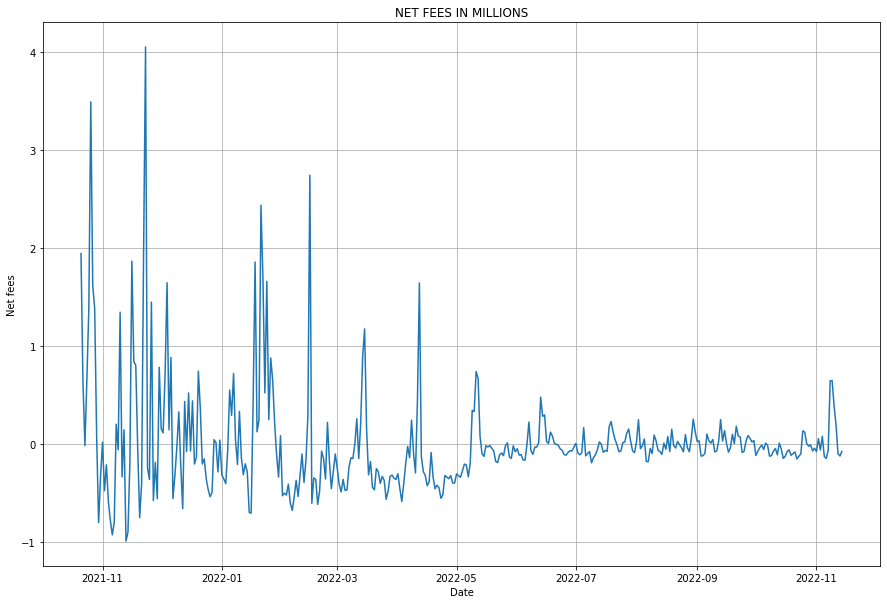

In [11]:
# Net fees in millions

plt.figure(figsize=(15,10))
plt.plot(pd.to_datetime(p['date']),p['Net Fees']/1e6)
plt.title("NET FEES IN MILLIONS")
plt.xlabel("Date")
plt.ylabel("Net fees")
plt.grid()
plt.show()

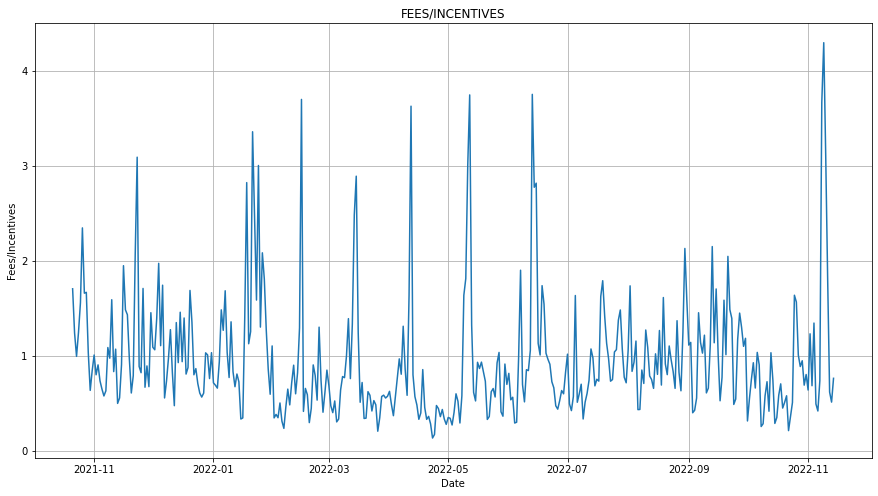

In [12]:
# Fees/Incentives

plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(p['date']),p['Fees/Incentives'])
plt.title("FEES/INCENTIVES")
plt.xlabel("Date")
plt.ylabel("Fees/Incentives")
plt.grid()
plt.show()

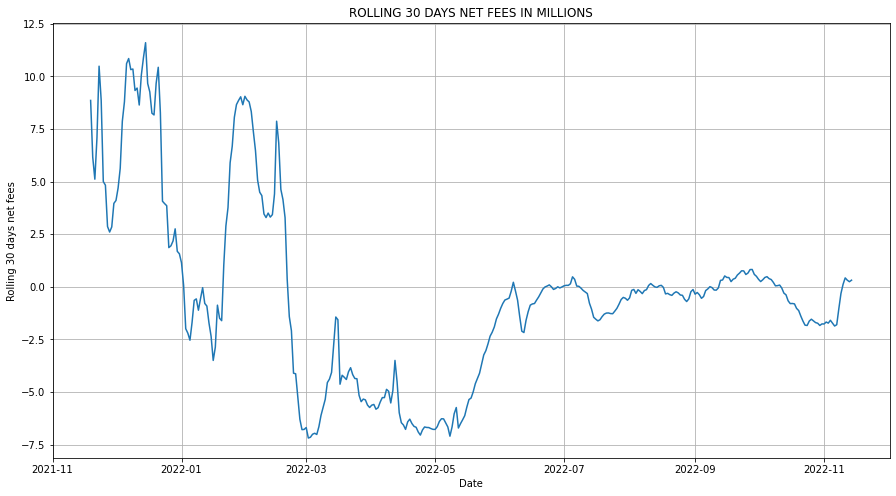

In [13]:
# Rolling 30 Days Net Fees

plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(p['date']),p['Rolling 30 Days Net Fees']/1e6)
plt.title("ROLLING 30 DAYS NET FEES IN MILLIONS")
plt.xlabel("Date")
plt.ylabel("Rolling 30 days net fees")
plt.grid()
plt.show()

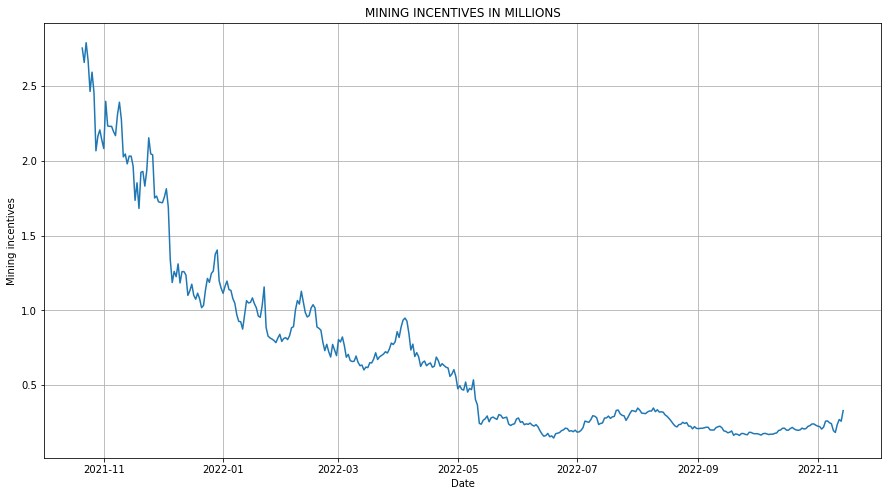

In [14]:
# Mining incentives

plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(p['date']),p['Mining incentives (approx)']/1e6)
plt.title("MINING INCENTIVES IN MILLIONS")
plt.xlabel("Date")
plt.ylabel("Mining incentives")
plt.grid()
plt.show()

In [15]:
# DataFrame with parameters

def dydx_30_days(volume, fee, incentive):

  volume_30_days = np.average(volume.iloc[-30:]['VOLUME'])/1e6
  volume_30_days_ = f'{volume_30_days:.2f}'
  volume_annualized = (volume_30_days*365)/1e3
  volume_annualized_ = f'{volume_annualized:.2f}'
  fees_30_days = np.average(fee.iloc[-30:]['revenue'])/1e6
  fees_30_days_ = f'{fees_30_days:.2f}'
  fees_annualized = fees_30_days*365
  fees_annualized_ = f'{fees_annualized:.2f}'
  fee_pct = fees_30_days/volume_30_days*100
  fee_pct_ = f'{fee_pct:.5f}'
  incentive_30_days = np.average(incentive.iloc[-30:]['Mining incentives (approx)'])/1e6
  incentive_30_days_ = f'{incentive_30_days:.2f}'
  incentive_annualized = incentive_30_days*365
  incentive_annualized_ = f'{incentive_annualized:.2f}'
  fees_incentives_ratio = fees_30_days/incentive_30_days
  fees_incentives_ratio_ = f'{fees_incentives_ratio:.8f}'
  non_subsidized_revenue = (fees_30_days - incentive_30_days)*1e6
  non_subsidized_revenue_ = f'{non_subsidized_revenue:.2f}'
  non_subsidized_revenue_annualized = (non_subsidized_revenue*365)/1e6
  non_subsidized_revenue_annualized_ = f'{non_subsidized_revenue_annualized:.2f}'
  non_subsidized_volume = (non_subsidized_revenue*100/fee_pct)/1e6
  non_subsidized_volume_ = f'{non_subsidized_volume:.4f}'
  non_subsidized_volume_annualized = (non_subsidized_volume*365)/1e3
  non_subsidized_volume_annualized_ = f'{non_subsidized_volume_annualized:.2f}'

  col = ['Average Daily', 'Annualized']
  rows = ['Volume', 'Fees', 'Fees %', 'Incentive', 'Fees/Incentives', 'Non-subsidized revenue', 'Non-subsidized volume']
              
  data = [{'Average Daily':volume_30_days_+' M','Annualized':volume_annualized_+'B'}, 
          {'Average Daily':fees_30_days_+' M','Annualized':fees_annualized_+'M '}, 
          {'Average Daily':fee_pct_,'Annualized':' '},
          {'Average Daily':incentive_30_days_+' M','Annualized':incentive_annualized_+' M'},
          {'Average Daily':'    '+fees_incentives_ratio_,'Annualized':'      '},
          {'Average Daily':non_subsidized_revenue_,'Annualized':non_subsidized_revenue_annualized_+' M'},
          {'Average Daily':non_subsidized_volume_+' M','Annualized':non_subsidized_volume_annualized_+' B'}
          ]
  return pd.DataFrame(data = data, index = rows, columns=col)

In [16]:
# DataFrame with parameters

df = dydx_30_days(VOLUME_dydx, FEE_dydx, p[~p['Mining incentives (approx)'].isnull()])

In [17]:
df

,Average Daily,Annualized
Volume,942.33 M,343.95B
Fees,0.24 M,85.99M
Fees %,0.02500,
Incentive,0.23 M,82.18 M
Fees/Incentives,1.04634856,
Non-subsidized revenue,10435.21,3.81 M
Non-subsidized volume,41.7408 M,15.24 B


In [ ]:
# Change